**IMPORT LIBRARY**

In [3]:
import pandas as pd
import random as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**IMPORT CSV KE DATASET**

In [4]:
df = pd.read_csv('wine.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,7830,Italy,This is the first vintage of this wine that wi...,Campo ai Sasso,87,NaN,Tuscany,Rosso di Montalcino,NaN,NaN,NaN,Marchesi de' Frescobaldi 2000 Campo ai Sasso ...,Red Blend,Marchesi de' Frescobaldi
7831,7831,Australia,It seems as if the emphasis is more on the oak...,Wilgha,87,34.0,South Australia,Coonawarra,NaN,Joe Czerwinski,@JoeCz,Hollick 1998 Wilgha Shiraz (Coonawarra),Shiraz,Hollick
7832,7832,Australia,"At 93% Shiraz, many wineries would have just l...",NaN,87,17.0,South Australia,Limestone Coast,NaN,Joe Czerwinski,@JoeCz,Hollick 1999 Shiraz-Cabernet Sauvignon (Limest...,Shiraz-Cabernet Sauvignon,Hollick
7833,7833,Spain,"This structured, medium-weight wine's nose off...",Can Feixes Blanc Selecciò,87,10.0,Catalonia,Catalonia,NaN,NaN,NaN,Huguet de Can Feixes 2000 Can Feixes Blanc Sel...,White Blend,Huguet de Can Feixes


In [5]:
#menampilkan informasi umum tentang dataset
print(df.info())
#menampilkan statistik deskriptif dari kolom numerik di dataset
print(df.describe())
#menampilkan beberapa baris pertama dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7835 entries, 0 to 7834
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7835 non-null   int64  
 1   country                7832 non-null   object 
 2   description            7835 non-null   object 
 3   designation            5497 non-null   object 
 4   points                 7835 non-null   int64  
 5   price                  7294 non-null   float64
 6   province               7832 non-null   object 
 7   region_1               6550 non-null   object 
 8   region_2               3040 non-null   object 
 9   taster_name            6200 non-null   object 
 10  taster_twitter_handle  5943 non-null   object 
 11  title                  7834 non-null   object 
 12  variety                7834 non-null   object 
 13  winery                 7834 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 857.1+

In [6]:
#mengubah calues kolom yang bertipe string/object menjadi numerik
for col in ['country','description','designation','province','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery']:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [7]:
df #menampilkan data yang sudah diupdate tipe string/objek menjadi numerik

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,18,1020,4082,87,NaN,161,220,17,8,4,5194,303,3152
1,1,26,6439,249,87,15.0,51,671,17,14,10,5868,197,3583
2,2,33,4882,4226,87,14.0,125,664,16,13,7,5911,189,3605
3,3,33,3902,3063,87,13.0,100,296,17,0,14,6625,213,4022
4,4,33,3592,4046,87,65.0,125,664,16,13,7,6747,192,4090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,7830,18,6474,578,87,NaN,189,484,17,18,14,4679,207,2874
7831,7831,1,3009,4140,87,34.0,165,158,17,7,1,3673,238,2300
7832,7832,1,1253,4226,87,17.0,165,309,17,7,1,3674,239,2300
7833,7833,31,6852,586,87,10.0,31,102,17,18,14,3700,303,2319


In [8]:
print(df.columns)# menampilkan daftar nama kolom dataset

features = df[['points','price']]# memilih 2 kolom, yaitu 'point' dan 'price', untuk analisis lebih lanjut
features = features.dropna()#menghapus baris yang memiliki nilai kosong (NAN) dalam subsetdataset

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


**VISUALISASI PERSEBARAN DATA**

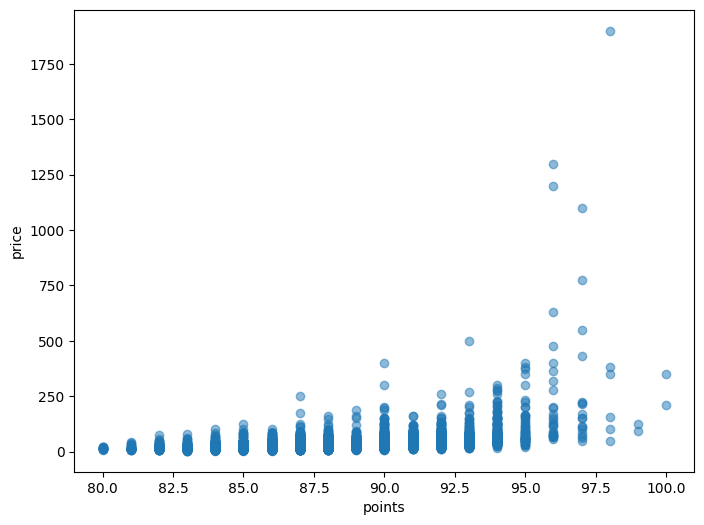

In [9]:
plt.figure(figsize=(8,6)) #mengatur ukuran plot
plt.scatter(features['points'], features['price'], alpha=0.5)#membuat scatter plot untuk memvisualisasikan hubungan antara 'point' dan 'price'
plt.xlabel('points')#memberi label pada sumbu x
plt.ylabel('price')#memberi label pada sumbu y
plt.show()# tampilkan plot

**DATA SCALING**

In [10]:
scaler = StandardScaler()#mengimpor kelas standarscaler dari sklearn untuk menormalkan atau menstandarkan fitur
scaler.fit(features)#melakukan fitting pada scaler dengan dataset 'features', menghitung mean dan standar devisiasi untuk scaling
df_scaled = scaler.transform(features)#mentransformasi data 'features' menggunakan mean dan standar devisiasi yang sudah dihitung untuk menstandarkan data
df_scaled

array([[-0.39092723, -0.42218805],
       [-0.39092723, -0.44360026],
       [-0.39092723, -0.46501247],
       ...,
       [-0.39092723, -0.37936363],
       [-0.39092723, -0.5292491 ],
       [-0.39092723, -0.20806596]])

In [11]:
#menampilkan 12 data pertama pada dataframe yang akan dianalisis
df_scaled = pd.DataFrame(df_scaled, columns=['points','price']).head(12)
df_scaled

,points,price
0,-0.390927,-0.422188
1,-0.390927,-0.443600
2,-0.390927,-0.465012
3,-0.390927,0.648422
4,-0.390927,-0.422188
5,-0.390927,-0.400776
6,-0.390927,-0.229478
7,-0.390927,-0.486425
8,-0.390927,-0.165242
9,-0.390927,-0.336539


**K-MEANS CLUSTERING MODELLING**

In [12]:
from sklearn.cluster import KMeans
#membuat model objek Kmeans dengan jumlah cluster yang diinginkan sebanyak 3
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [13]:
#menggunakan kmeans untuk melakukan fitting dan prediksi klaster berdasarkan data
#'point' dan 'price' yang sudah dinormalisasi
y_predicted = kmeans.fit_predict(df_scaled[['points','price']])
#menampilkan hasil prediksi klaster untuk setiap data
print(y_predicted)

[0 0 0 1 0 0 2 0 2 0 2 2]


**ANALISIS AKURASI MODEL MENGGUNAKAN SILHOUETTE**

In [14]:
#mencetak inertia
print("inertia:", kmeans.inertia_)

inertia: 0.03924939328009297


In [15]:
#menghitung silhouette score
silhouette_avg = silhouette_score(df_scaled[['points','price']], y_predicted)
print("silhoutte score:", silhouette_avg)

silhoutte score: 0.654988808769217


**PENGUJIAN MODEL**

In [16]:
#menambahkan kolom baru 'kualitas_wine' ke dalam df 'df_scaled' yang berisi hasil klaster dari kmeans (y_predicted)
df_scaled['kualitas_wine'] = y_predicted
#menampilkan df 'df_scaled' yang sudah diperbarui dengan kolom 'kualitas_wine'
print(df_scaled)

      points     price  kualitas_wine
0  -0.390927 -0.422188              0
1  -0.390927 -0.443600              0
2  -0.390927 -0.465012              0
3  -0.390927  0.648422              1
4  -0.390927 -0.422188              0
5  -0.390927 -0.400776              0
6  -0.390927 -0.229478              2
7  -0.390927 -0.486425              0
8  -0.390927 -0.165242              2
9  -0.390927 -0.336539              0
10 -0.390927 -0.101005              2
11 -0.390927 -0.015356              2


**VISUALISASI CLUSTERED DATA**

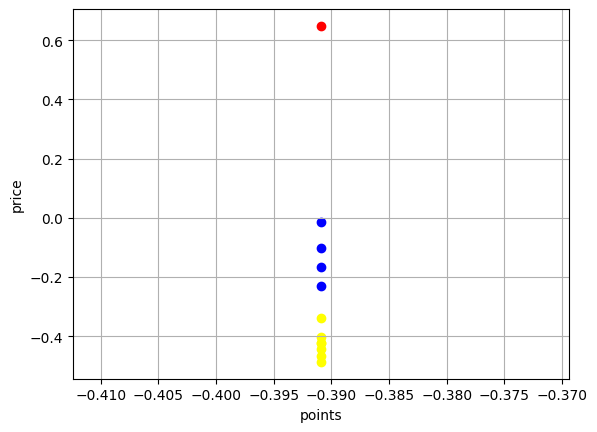

In [17]:
#mengatur ulang indekx pada dataframe 'df' dan menghapus kolom indeks lama
df = df.reset_index(drop=True)
#mengatur ulang indeks pada dataframe 'df_scaled' dan menghapus kolom indeks lama
df_scaled = df_scaled.reset_index(drop=True)

#memilih data yang memiliki klaster kualitas_wine = x dan menyimpan dalam dataframe 'df_scaled
df_scaled1 = df_scaled[df_scaled.kualitas_wine == 0]
df_scaled2 = df_scaled[df_scaled.kualitas_wine == 1]
df_scaled3 = df_scaled[df_scaled.kualitas_wine == 2]

#membuat scatter plot untuk data yang memiliki klaster kualitas_wine dengan warna yang diinginkan
plt.scatter (df_scaled1.points,df_scaled1['price'],color='yellow')
plt.scatter (df_scaled2.points,df_scaled2['price'],color='red')
plt.scatter (df_scaled3.points,df_scaled3['price'],color='blue')

plt.xlabel('points')#menambahkan label pada sumbu x dengan nama 'point'
plt.ylabel('price')#menambahkan label pada sumbu y dengan nama 'price'
plt.grid()#menampilkan grid pada plot untuk mempermudah pembacaan

**MENENTUKAN HASIL K-MEANS CLUSTERING KE DATAFRAME**

In [18]:
#mengimpor pustaka numpy untuk menggunakan fungsi np.select
import numpy as np

#mendefinisikan kondisi-kondisi untuk memilih nilai berdasarkan kolom 'kualitas_wine'
conditions = [
    (df_scaled['kualitas_wine']==0),
    (df_scaled['kualitas_wine']==1),
    (df_scaled['kualitas_wine']==2)]
#mendefinisikan pilihan label yang sesuai dengan kondisi yang sudah didefinisikan
choices = ['cukup','sangat baik','kurang']
#menggunakan np.select untuk menganti nilai pada kolom 'kualitas_wine' berdasarkan kondisi dan pilihan
df_scaled['kualitas_wine'] = np.select(conditions, choices)
df_scaled

,points,price,kualitas_wine
0,-0.390927,-0.422188,cukup
1,-0.390927,-0.443600,cukup
2,-0.390927,-0.465012,cukup
3,-0.390927,0.648422,sangat baik
4,-0.390927,-0.422188,cukup
5,-0.390927,-0.400776,cukup
6,-0.390927,-0.229478,kurang
7,-0.390927,-0.486425,cukup
8,-0.390927,-0.165242,kurang
9,-0.390927,-0.336539,cukup


**MENENTUKAN K OPTIMAL DENGAN METODE ELBOW**

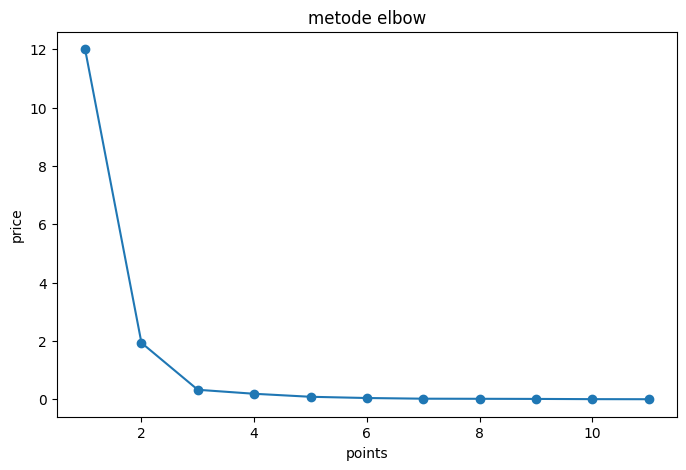

In [19]:
#mengimpor pustaka pandas dengan alias 'pd', untuk manipulasi data dalam bentuk dataframe
import pandas as pd

#membuat data dalam bentuk dictionary, yang berisi informasi tentang 'point' dan 'price'
data = {'points': [87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87],
        'price' : [22.7, 15.0, 14.0, 13.0, 65.0, 15.0, 16.0, 24.0, 12.0, 27.0, 19.0, 30.0]
        }

#mengubah data dictionary menjadi dataframe menggunakan pandas
df = pd.DataFrame(data)

#membuat objek scaler menggunakan standadcaler dari sklearn untuk menstandarkan data
scaler = StandardScaler()
#menggunakan scaler untuk menstandarkan data 'df' dan mengubah menjadi array numpy yang telah distandarisasi
scaled_features = scaler.fit_transform(df)
#menyiapkan list kosong untuk menyimpan nilai 'inertia' pada setiap jumlah klaster yang diuji
inertia = []

k_range = range(1, 12)#menentukan rentang jumlah klaster (1 hingga 11)
for k in k_range:#looping untuk mencoba klaster 1-11 dan menghitung 'inertia' jumlah klasternya
  kmeans = KMeans(n_clusters=k, random_state=42)#membuat objek kmeans dengan jumlah klaster 'k' dan pengaturan random_state reproduktibilitas
  kmeans.fit(scaled_features)#melakukan fitting model kmeans pada data yang telah distandarkan
  inertia.append(kmeans.inertia_)#menyimpan nilai inertia (jumlah kuadrat jarak setiap titik data ke pusat klaster) untuk klaster saat ini

plt.figure(figsize=(8,5))#membuat plot untuk visualisai metode elbow dengan ukuran gambar 8x5 inci
plt.plot(k_range, inertia, marker='o')#menampilkan plot dari jumlah (k_range) terhadap nilai inertia yang telah dihitung
plt.title('metode elbow')#menambahkan judul pada grafik
plt.xlabel('points')#menambahkan label pada sumbu x
plt.ylabel('price')#menambahkan label pada sumbu y
plt.show()#menampilkan grafik

In [20]:
#membuat model kmeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

#menambahkan hasil klustering ke dataframe
df['cluster'] = kmeans.labels_

**VISUALISASI CLUSTERED DATA**

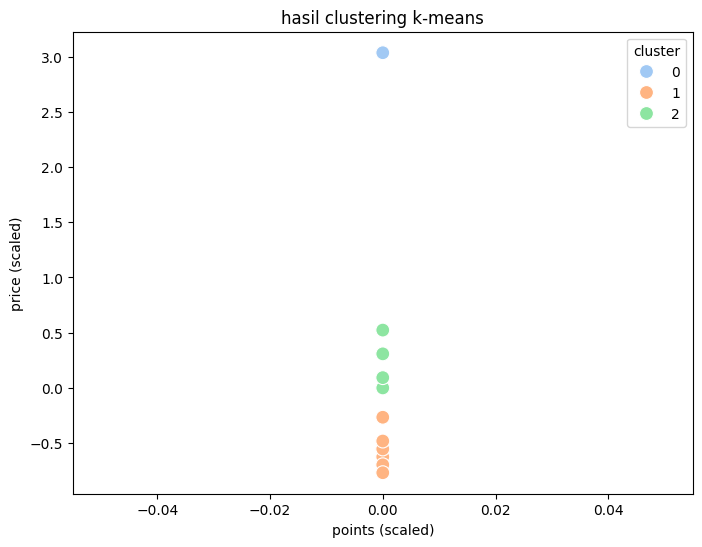

In [21]:
plt.figure(figsize=(8,6))#menampilkan ukuran plot
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=df['cluster'],
    palette='pastel',
    s=100
)
plt.title('hasil clustering k-means')
plt.xlabel('points (scaled)')
plt.ylabel('price (scaled)')
plt.legend(title='cluster')
plt.show()

**ANALISIS CENTROID**

In [22]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)#mengubah kembali koordinat centroid yang berada dalam skala standar ke asli
print("\ncentroid cluster (points dan price):")#menampilkan teks
print(centroids)#print centroids

#menghitung jumlah data di setiap cluster
print("\njumlah data di setiap cluster:")
print(df['cluster'].value_counts())


centroid cluster (points dan price):
[[87.         65.        ]
 [87.         14.85714286]
 [87.         25.925     ]]

jumlah data di setiap cluster:
cluster
1    7
2    4
0    1
Name: count, dtype: int64
